In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv('fandango_scrape.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [3]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [4]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


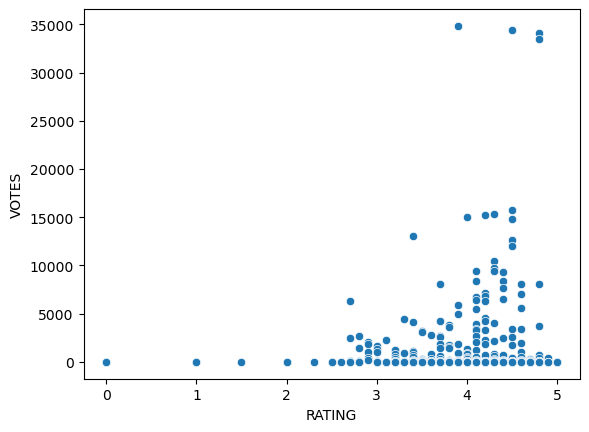

In [5]:
sns.scatterplot(data=fandango, x='RATING',y='VOTES');

In [6]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337
6,Kingsman: The Secret Service (2015),4.5,4.2,15205
7,Minions (2015),4.0,4.0,14998
8,Avengers: Age of Ultron (2015),5.0,4.5,14846
9,Into the Woods (2014),3.5,3.4,13055


In [14]:
fandango['YEAR']=fandango['FILM'].apply(lambda x : x.split('(')[-1][:-1]).apply(lambda y : int(y))

In [15]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


<Axes: xlabel='YEAR', ylabel='count'>

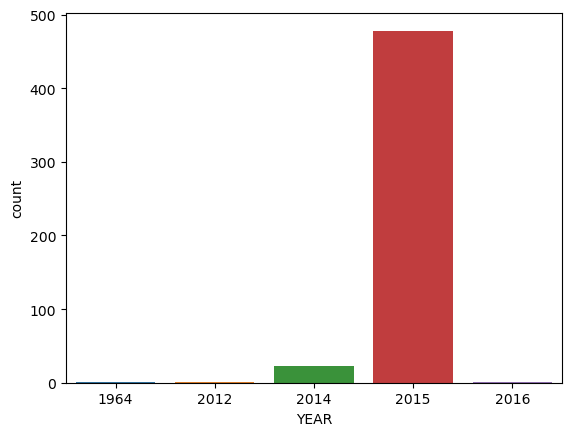

In [16]:
sns.countplot(data=fandango, x='YEAR')

In [18]:
(fandango['VOTES'] == 0).sum()

69

In [19]:
fandango_new = fandango[fandango['VOTES'] != 0]
len(fandango_new)

435

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'RATINGS VS STAR')

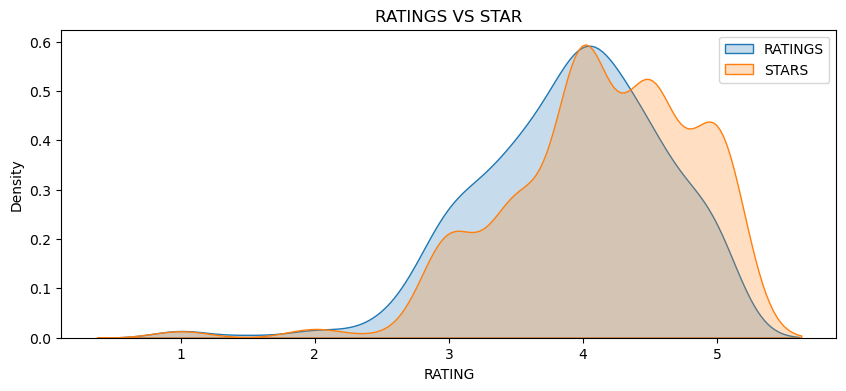

In [21]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=fandango_new,x='RATING',label='RATINGS', fill = True)
sns.kdeplot(data=fandango_new,x='STARS',label='STARS', fill = True)
plt.legend()
plt.title('RATINGS VS STAR')

In [26]:
fandango_new['diff_stars'] = np.round(fandango_new['STARS'] - fandango_new['RATING'], 1)
fandango_new.head()

/var/folders/wl/v3x3g82n3b38s3cvwvtr0r7h0000gn/T/ipykernel_4026/570791970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_new['diff_stars'] = np.round(fandango_new['STARS'] - fandango_new['RATING'], 1)


,FILM,STARS,RATING,VOTES,YEAR,diff_stars
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


<Axes: xlabel='diff_stars', ylabel='count'>

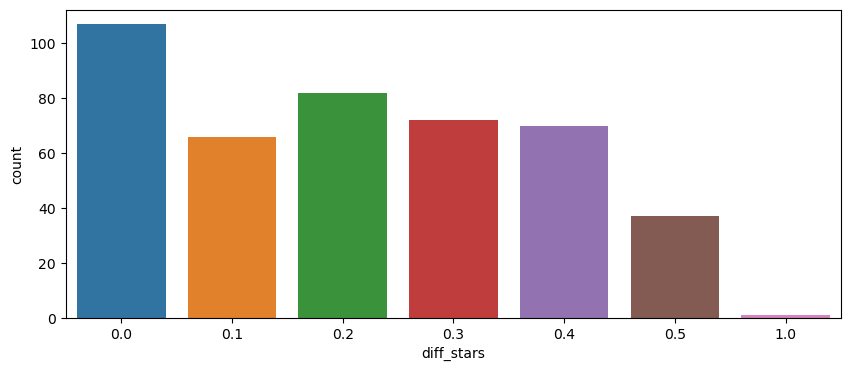

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(data=fandango_new, x='diff_stars')


In [28]:
fandango_new[fandango_new['diff_stars'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,diff_stars
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


###### Comparison with other Sites

In [29]:
all_sites = pd.read_csv('all_sites_scores.csv')
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [30]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

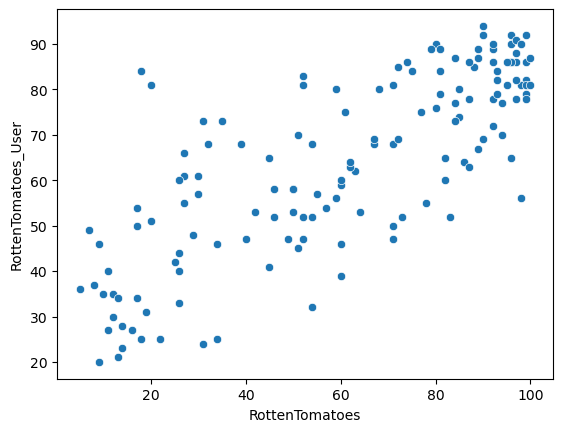

In [31]:
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

In [33]:
all_sites['RottenTomatoes_diff'] = all_sites['RottenTomatoes']- all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [35]:
np.mean(all_sites['RottenTomatoes_diff'].abs())

15.095890410958905

In [39]:

#top 10 critics ratings being more than user ratings
all_sites.nsmallest(10,'RottenTomatoes_diff')[['FILM', 'RottenTomatoes_diff']]

,FILM,RottenTomatoes_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39
132,Max (2015),-38
15,Taken 3 (2015),-37
19,Pixels (2015),-37
51,Entourage (2015),-36
47,Annie (2014),-34


In [40]:
#top 10 user ratings being more than critics ratings
all_sites.nlargest(10,'RottenTomatoes_diff')[['FILM', 'RottenTomatoes_diff']]

,FILM,RottenTomatoes_diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24
145,"Kumiko, The Treasure Hunter (2015)",24
90,The SpongeBob Movie: Sponge Out of Water (2015),23
7,Top Five (2014),22
11,Black Sea (2015),22
87,Maggie (2015),22


##### Metacritic

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

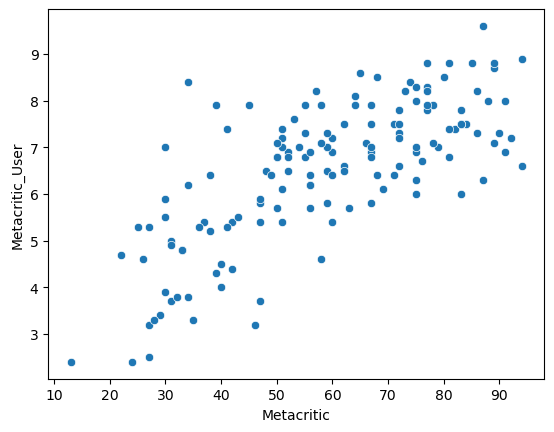

In [42]:
sns.scatterplot(data=all_sites,x='Metacritic', y = 'Metacritic_User')

In [43]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'RottenTomatoes_diff'],
      dtype='object')

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

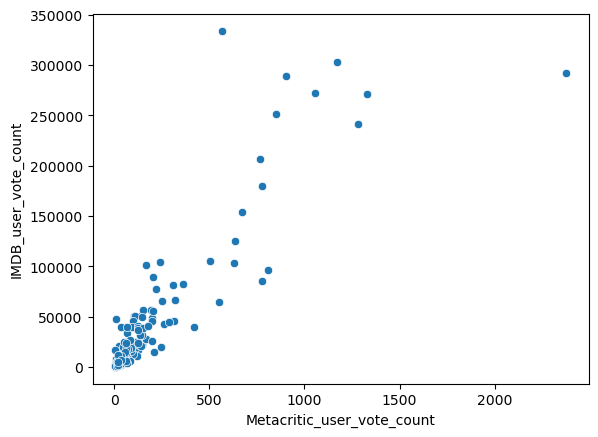

In [44]:
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y = 'IMDB_user_vote_count')

###### Fandango Vs All others

In [45]:
df = pd.merge(fandango_new,all_sites,how='inner')
df

,FILM,STARS,RATING,VOTES,YEAR,diff_stars,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9


In [49]:
df['RT_N'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_N'] = np.round(df['RottenTomatoes_User']/20,1)

In [59]:
df['Meta_N']= np.round(df['Metacritic']/20,1)
df['MetaU_N']= np.round(df['Metacritic_User']/2,1)
df['IMDB_N']= np.round(df['IMDB']/2,1)

In [60]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,diff_stars,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_diff,RT_N,RTU_N,Meta_N,MetaU_N,IMDB_N
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [61]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'diff_stars',
       'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'RottenTomatoes_diff', 'RT_N', 'RTU_N',
       'Meta_N', 'MetaU_N', 'IMDB_N'],
      dtype='object')

In [62]:
df_N = df[['STARS', 'RATING','RT_N', 'RTU_N','Meta_N', 'MetaU_N', 'IMDB_N']]
df_N

,STARS,RATING,RT_N,RTU_N,Meta_N,MetaU_N,IMDB_N
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

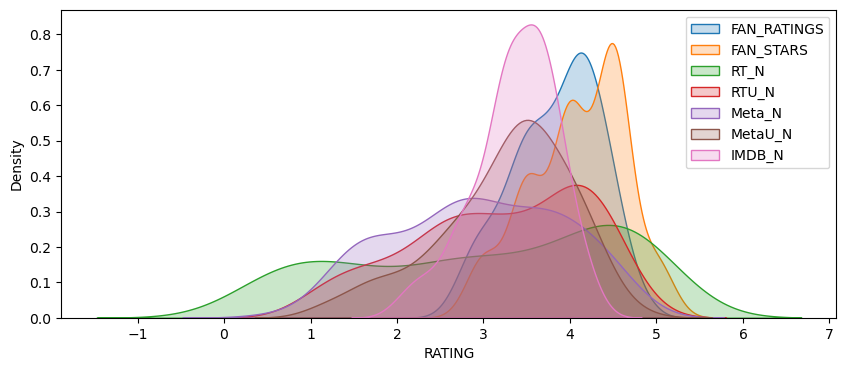

In [64]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=df_N,x='RATING',fill=True, label = 'FAN_RATINGS')
sns.kdeplot(data=df_N,x='STARS',fill=True, label = 'FAN_STARS')
sns.kdeplot(data=df_N,x='RT_N',fill=True, label = 'RT_N')
sns.kdeplot(data=df_N,x='RTU_N',fill=True, label = 'RTU_N')
sns.kdeplot(data=df_N,x='Meta_N',fill=True, label = 'Meta_N')
sns.kdeplot(data=df_N,x='MetaU_N',fill=True, label = 'MetaU_N')
sns.kdeplot(data=df_N,x='IMDB_N',fill=True, label = 'IMDB_N')
plt.legend()
plt.show()

In [66]:
df_N_F = df[['FILM','STARS', 'RATING','RT_N', 'RTU_N','Meta_N', 'MetaU_N', 'IMDB_N']]
df_N_F

,FILM,STARS,RATING,RT_N,RTU_N,Meta_N,MetaU_N,IMDB_N
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,4.8,4.3,4.3,3.6,3.7


In [67]:
df_N_F.nsmallest(10,'RT_N')

,FILM,STARS,RATING,RT_N,RTU_N,Meta_N,MetaU_N,IMDB_N
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7
